In [2]:
%matplotlib inline
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import *
from tensorflow.keras.utils import *
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train.reshape(60000,784)/255.0, x_test.reshape(10000,784)/255.0

In [4]:
epoch = 100
lr = 1e-1
batch_size = 256
initializer = initializers.he_normal(seed=114)

In [5]:
def step_decay(epoch):
    initial_lrate = 0.1
    drop = math.sqrt(0.5)
    epochs_drop = 5
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

In [6]:
lrate = callbacks.LearningRateScheduler(step_decay)

In [7]:
def basic_layer(node, dropoutrate = 0):
    layer = models.Sequential()
    layer.add(layers.Dense(node, kernel_initializer=initializer))
    if(dropoutrate>0):
        layer.add(layers.Dropout(dropoutrate))
    layer.add(layers.BatchNormalization())
    layer.add(layers.Activation('elu'))
    return layer

In [8]:
model = models.Sequential()
model.add(layers.Dense(128, input_dim=784))
model.add(layers.Dropout(0.125))
model.add(layers.BatchNormalization())
model.add(layers.Activation('elu'))
model.add(basic_layer(128, 0.125))
model.add(basic_layer(256, 0.25))
model.add(basic_layer(256, 0.25))
model.add(basic_layer(512, 0.5))
model.add(basic_layer(512, 0.5))
model.add(basic_layer(256))
model.add(basic_layer(128))
model.add(basic_layer(64))
model.add(layers.Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
batch_normalization_v2 (Batc (None, 128)               512       
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 128)               17024     
_________________________________________________________________
sequential_2 (Sequential)    (None, 256)               34048     
_________________________________________________________________
sequential_3 (Sequential)    (None, 256)               6

In [10]:
sgd = optimizers.SGD(lr=lr)
model.compile(optimizer= sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, 
                    y_train, 
                    epochs=epoch, 
                    batch_size=batch_size,
                    validation_data=(x_test, y_test), 
                    callbacks=[lrate])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 8s 133us/sample - loss: 0.8032 - accuracy: 0.7145 - val_loss: 0.5925 - val_accuracy: 0.8138
Epoch 2/100
60000/60000 [==============================] - 6s 106us/sample - loss: 0.5343 - accuracy: 0.8108 - val_loss: 0.5345 - val_accuracy: 0.8239
Epoch 3/100
60000/60000 [==============================] - 6s 107us/sample - loss: 0.4855 - accuracy: 0.8276 - val_loss: 0.4924 - val_accuracy: 0.8334
Epoch 4/100
60000/60000 [==============================] - 6s 106us/sample - loss: 0.4602 - accuracy: 0.8371 - val_loss: 0.4697 - val_accuracy: 0.8451
Epoch 5/100
60000/60000 [==============================] - 6s 106us/sample - loss: 0.4358 - accuracy: 0.8448 - val_loss: 0.4457 - val_accuracy: 0.8481
Epoch 6/100
60000/60000 [==============================] - 6s 107us/sample - loss: 0.4257 - accuracy: 0.8490 - val_loss: 0.4356 - val_accuracy: 0.8494
Epoch 7/100
60000/60000 [===================

60000/60000 [==============================] - 8s 131us/sample - loss: 0.3292 - accuracy: 0.8815 - val_loss: 0.3801 - val_accuracy: 0.8728
Epoch 55/100
60000/60000 [==============================] - 8s 127us/sample - loss: 0.3291 - accuracy: 0.8820 - val_loss: 0.3815 - val_accuracy: 0.8735
Epoch 56/100
60000/60000 [==============================] - 8s 131us/sample - loss: 0.3297 - accuracy: 0.8814 - val_loss: 0.3804 - val_accuracy: 0.8741
Epoch 57/100
60000/60000 [==============================] - 8s 130us/sample - loss: 0.3245 - accuracy: 0.8833 - val_loss: 0.3807 - val_accuracy: 0.8731
Epoch 58/100
60000/60000 [==============================] - 8s 129us/sample - loss: 0.3271 - accuracy: 0.8822 - val_loss: 0.3811 - val_accuracy: 0.8740
Epoch 59/100
60000/60000 [==============================] - 8s 132us/sample - loss: 0.3304 - accuracy: 0.8813 - val_loss: 0.3806 - val_accuracy: 0.8724
Epoch 60/100
60000/60000 [==============================] - 8s 136us/sample - loss: 0.3287 - accuracy

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

10000/10000 - 1s - loss: 0.3796 - accuracy: 0.8740


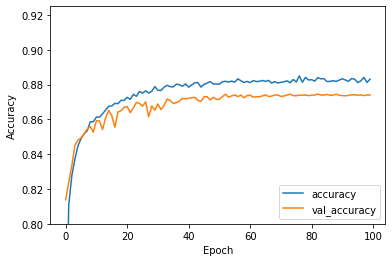

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 0.925])
plt.legend(loc='lower right')
# plt.savefig("ann_acc.png", dpi=500)

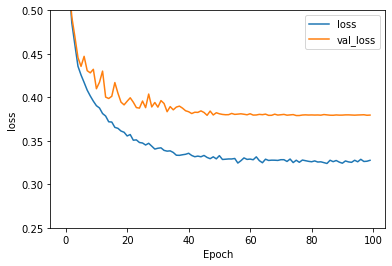

In [13]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.25, 0.5])
plt.legend(loc='upper right')
# plt.savefig("ann_loss.png", dpi=500)